In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_att_salary_18-19')

In [3]:
qbs.dtypes

NAME         object
ATT           int64
ATT_rank    float64
salary        int64
dtype: object

In [4]:
qbs.head()

,NAME,ATT,ATT_rank,salary
0,Ben Roethlisberger,675,1.0,21850000
1,Andrew Luck,639,2.0,24594000
2,Matt Ryan,608,3.0,30000000
3,Kirk Cousins,606,4.0,28000000
4,Aaron Rodgers,597,5.0,33500000


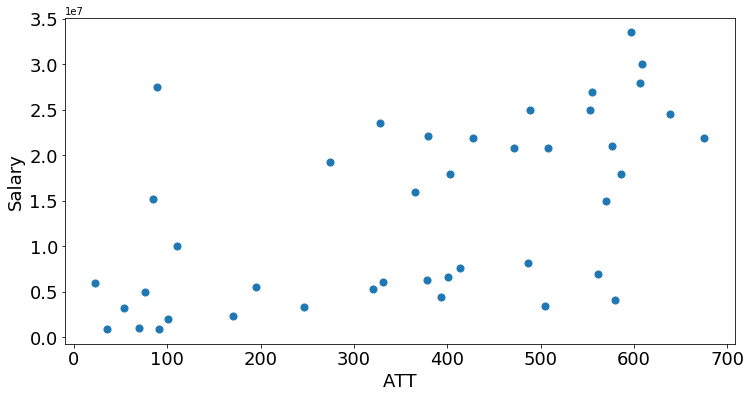

In [5]:
ax = qbs.plot(kind="scatter", x = 'ATT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('ATT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['ATT', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 7.93016446e-17, -6.60847038e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.39063347,  0.79633683],
       [ 0.06661789,  0.67728013],
       [ 0.3607138 , -0.79903419],
       [ 1.0778035 ,  1.08212628],
       [-1.29325803, -1.02989164]])

In [11]:
km.predict(X)

array([3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,ATT,ATT_rank,salary,clusters
0,Ben Roethlisberger,675,1.0,21850000,3
1,Andrew Luck,639,2.0,24594000,3
2,Matt Ryan,608,3.0,30000000,3
3,Kirk Cousins,606,4.0,28000000,3
4,Aaron Rodgers,597,5.0,33500000,3


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[8.70000000e+01, 2.13750000e+07],
       [3.78142857e+02, 2.02204761e+07],
       [4.36900000e+02, 5.90427060e+06],
       [5.80166667e+02, 2.41463750e+07],
       [1.06454545e+02, 3.66558564e+06]])

In [14]:
qbs.groupby('clusters')[['ATT', 'salary']].mean()

,ATT,salary
clusters,,
0,87.000000,2.137500e+07
1,378.142857,2.022048e+07
2,436.900000,5.904271e+06
3,580.166667,2.414638e+07
4,106.454545,3.665586e+06


In [15]:
centroids = qbs.groupby('clusters')[['ATT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

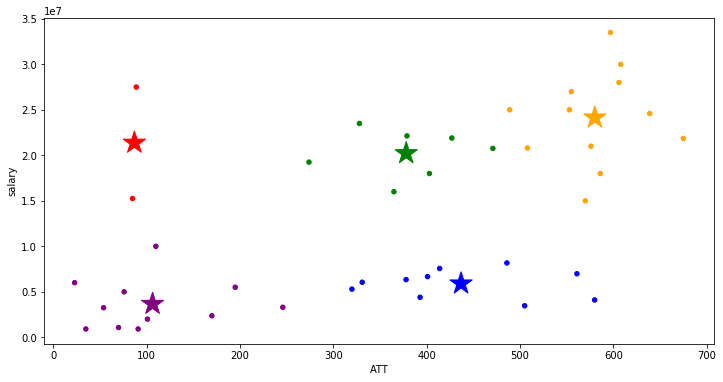

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'ATT', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'ATT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

9.879230526978967

In [18]:
silhouette_score(X, km.labels_)

0.47989704794719756